<h1>サポートベクトルマシン(SVM)</h1>

<h2>1. 線形分離可能(ソフトマージンSVM)</h2>

<h2>必要モジュールとデータのインポート</h2>

In [ ]:
# 必要なモジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

<h2>データの作成と確認</h2>

In [ ]:
# データの生成
# 出力ラベルy = 0のデータを生成
X_train_0 = np.random.multivariate_normal(mean = [1, 1], 
                                          cov = [[1, -0.2], [-0.2, 1]], 
                                          size = 50)
y_train_0 = np.zeros(50)
# 出力ラベルy = 1のデータを生成
X_train_1 = np.random.multivariate_normal(mean = [-1, -1], 
                                          cov = [[1, -0.2], [-0.2, 1]], 
                                          size = 50)
y_train_1 = np.ones(50)
# 2種類のデータを結合する。
X_train = np.vstack((X_train_0, X_train_1))
y_train = np.hstack((y_train_0, y_train_1))

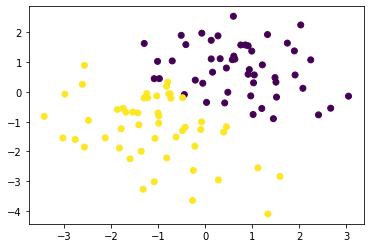

In [ ]:
# データの可視化
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
# 入力を標準化する。
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)

<h2>SVMで学習・分類する</h2>

In [ ]:
# インスタンスを建てる
svc_l= SVC(C = 1.0, kernel = "linear")
# fitメソッドで学習させる
svc_l.fit(X_train_sc, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# テストデータの入力を生成し予測させる
# 格子点上にデータを生成する
xx, yy = np.meshgrid(
    np.linspace(start = -4.5, stop = 4.5, num = 100), 
    np.linspace(start = -4.5, stop = 4.5, num = 100))
X_test = np.c_[xx.ravel(), yy.ravel()]
# 入力の標準化
X_test_sc = sc.transform(X_test)
# 出力ラベルの予測
y_pred = svc_l.predict(X_test_sc)
y_pred

array([1., 1., 1., ..., 0., 0., 0.])

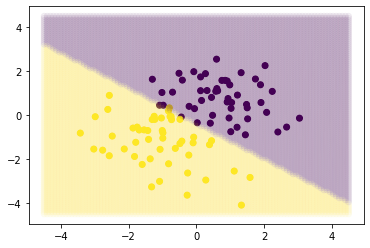

In [ ]:
# データの可視化
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_pred, alpha = 0.05)
plt.show()

<h2>2. 線形分離不可能(カーネルSVM)</h2>

<h2>データの作成と確認</h2>

In [ ]:
X_train, y_train = make_moons(n_samples = 100, noise = 0.3, random_state = 10)

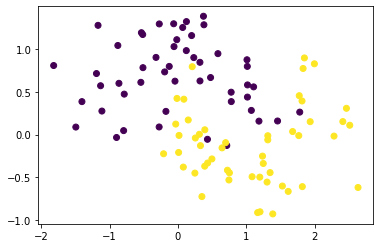

In [ ]:
# データの可視化
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.show()

<h2>SVMで学習・分類する</h2>

In [ ]:
pipe_k = make_pipeline(StandardScaler(),
                     SVC(C=1.0, kernel="rbf", gamma=100.00)
                    )
pipe_k.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=100.0, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
# テストデータの入力を生成し、実際に予測させる。
# 格子点上にデータを生成する。
xx, yy = np.meshgrid(
    np.linspace(start = -3.1, stop = 3.1, num = 100), 
    np.linspace(start = -2.1, stop = 2.1, num = 100))
X_test = np.c_[xx.ravel(), yy.ravel()]

# 出力ラベルの予測
y_pred = pipe_k.predict(X_test)    # predictメソッド：予測ラベルの計算
y_pred

array([0, 0, 0, ..., 0, 0, 0])

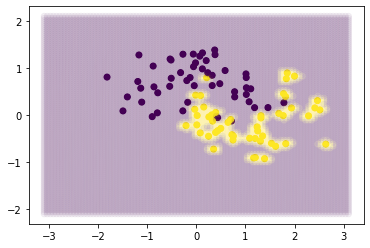

In [ ]:
# データの可視化
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_pred, alpha = 0.05)
plt.show()